In [ ]:
%pip install pandas matplotlib openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import re


import datetime
import os

    

In [ ]:


#用pd读取input下的几个excel文件
df_cient_summary = pd.read_excel('./input/生意参谋_客户概况.xlsx').iloc[:,:8]
df_follows_views = pd.read_excel('./input/生意参谋-客户关注分析-核心指标.xlsx').iloc[:,:5]
df_follows_contents_new = pd.read_excel('./input/生意参谋-客户关注分析-上新内容.xlsx').iloc[:,:2]
df_follows_contents_list = pd.read_excel('./input/生意参谋-客户关注分析-清单内容.xlsx').iloc[:,:2]
df_follows_contents = pd.read_excel('./input/生意参谋-内容管理-关注.xlsx').iloc[:,:2]
print("客户概况")
print(df_cient_summary.columns)
print("生意参谋-客户关注分析-核心指标")
print(df_follows_views.columns)
print("生意参谋-客户关注分析-上新内容")
print(df_follows_contents_new.columns)
print("生意参谋-客户关注分析-清单内容")
print(df_follows_contents_list.columns)
print("生意参谋-内容管理-关注")
print(df_follows_contents.columns)

In [ ]:
#把新抓的数据合并，并导出新表，把老表用一个old目录保存
df_cient_summary_TEMP = pd.read_excel('./input/temp/生意参谋_客户概况.xlsx').iloc[:,:8]
df_follows_views_TEMP = pd.read_excel('./input/temp/生意参谋-客户关注分析-核心指标.xlsx').iloc[:,:5]
df_follows_contents_new_TEMP = pd.read_excel('./input/temp/生意参谋-客户关注分析-上新内容.xlsx').iloc[:,:2]
df_follows_contents_list_TEMP = pd.read_excel('./input/temp/生意参谋-客户关注分析-清单内容.xlsx').iloc[:,:2]
df_follows_contents_TEMP = pd.read_excel('./input/temp/生意参谋-内容管理-关注.xlsx').iloc[:,:2]


In [ ]:
#合并历史数据
df_cient_summary = pd.concat([df_cient_summary_TEMP, df_cient_summary], ignore_index=True).drop_duplicates(subset='日期', keep='first').reset_index(drop=True)
df_follows_views = pd.concat([df_follows_views_TEMP, df_follows_views], ignore_index=True).drop_duplicates(subset='日期', keep='first').reset_index(drop=True)
df_follows_contents_new = pd.concat([df_follows_contents_new_TEMP, df_follows_contents_new], ignore_index=True).drop_duplicates(subset=['日期','上新内容列表按曝光人数排序'], keep='first').reset_index(drop=True)
df_follows_contents_list = pd.concat([df_follows_contents_list_TEMP, df_follows_contents_list], ignore_index=True).drop_duplicates(subset=['日期','清单内容列表按曝光人数排序'], keep='first').reset_index(drop=True)
df_follows_contents = pd.concat([df_follows_contents_TEMP, df_follows_contents], ignore_index=True).drop_duplicates(subset='关注内容列表', keep='first').reset_index(drop=True)



In [ ]:
###下面代码移动旧数据，通过判断文件夹是否为空，来避免重复移动覆盖旧数据######################
import shutil

today = datetime.date.today()
folder_name = today.strftime("%Y%m%d")

input_dir = './input/old/'
folder_path = os.path.join(input_dir, folder_name)

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

#把旧的文件移动到这个文件夹，如果有相同名字就直接覆盖
folder_path = os.path.join(input_dir, folder_name)

files_to_move = [
    './input/生意参谋_客户概况.xlsx',
    './input/生意参谋-客户关注分析-核心指标.xlsx',
    './input/生意参谋-客户关注分析-上新内容.xlsx',
    './input/生意参谋-客户关注分析-清单内容.xlsx',
    './input/生意参谋-内容管理-关注.xlsx'
]

if not os.listdir(folder_path):
    for file in files_to_move:
        try:
            shutil.move(file, folder_path)
        except PermissionError as e:
            print(f"PermissionError: Could not move {file}. It might be open in another program. Error: {e}")
else:
    print("Folder is not empty, files will not be moved.")

In [ ]:
#再导出新的文件到input目录
df_cient_summary.to_excel('./input/生意参谋_客户概况.xlsx', index=False)
df_follows_views.to_excel('./input/生意参谋-客户关注分析-核心指标.xlsx', index=False)
df_follows_contents_new.to_excel('./input/生意参谋-客户关注分析-上新内容.xlsx', index=False)
df_follows_contents_list.to_excel('./input/生意参谋-客户关注分析-清单内容.xlsx', index=False)
df_follows_contents.to_excel('./input/生意参谋-内容管理-关注.xlsx', index=False)

## 关注信息流内容 - 数据清理

In [ ]:
# 删除哪些没有日期信息数据
df_follows_contents = df_follows_contents[df_follows_contents['关注内容列表'].str.contains(r'\d{4}-\d{2}-\d{2}', regex=True, na=False)]

#把 关注内容列表， 按照空行拆分为一个list，记住是空行
df_follows_contents['关注内容列表2'] = df_follows_contents['关注内容列表'].str.split('\n\t\n')

# 将拆分后的列表转换为 DataFrame
split_columns = df_follows_contents['关注内容列表2'].apply(pd.Series)


In [ ]:
#清理内容列表
#定义一个函数来提取数据
# def extract_data(text):
#     # 拆分文本为几个模块
#     sections = [section for section in text.split('\n\n')]
#     # 提取每个模块的标题和内容
#     title = sections[0].split('：')[1]

#     return {
#         "内容标题"：title,
# }


# # 示例数据
# data = [
#     "高级感衬衫！ | 衬衫怎么搭都好看，让你成为穿搭高手！\nID: 24255682137310\n多品上新\n\n2025-04-11\n20:11:12\n\n猜你喜欢已采纳\n\n已发布\n\n查看数据下线评论管理"
#     # 可以继续添加更多的内容
# ]

# # 创建DataFrame
# df = pd.DataFrame(data, columns=["内容"])

# 定义一个函数来提取信息
def extract_info(text):
    # 拆分文本，按空行分割
    sections = [section.strip() for section in text.split('\n\t\n')]
    #print(sections)
    # 提取各个模块内容
    title = sections[0].strip().split('\n')[0]  # 内容标题, 第一行
    content_id = re.search(r'ID:\s*(\d+)', sections[0]).group(1)  # id
    content_type = sections[0].strip().split('\n')[-1]  # 内容类型，最后一行
    publish_date_match = re.search(r'\d{4}-\d{2}-\d{2}', sections[1])  # 发布日期。 不能用位置判断，因为有字符“定时”
    if publish_date_match:
        publish_date = publish_date_match.group()  # 获取匹配的日期字符串
    else:
        publish_date = None  # 如果没有匹配，设置为 None
    
    publish_time = sections[1].strip().split('\n')[1]  # 发布时间
    adopted = sections[2].strip()  # 是否被采纳
    published = sections[3].strip()  # 是否已发布
    comments = sections[4].strip()  # 查看评论

    # 返回结果
    return {
        "内容标题": title,
        "id": content_id,
        "内容类型": content_type,
        "发布日期": publish_date,
        "发布时间": publish_time,
        "是否被采纳": adopted,
        "是否已发布": published,
        "查看评论": comments
    }

# 应用函数，提取所有行的信息
extracted_data = df_follows_contents["关注内容列表"].apply(extract_info)
print(len(extracted_data))

# 将提取到的数据转换为新的DataFrame
extracted_df = pd.DataFrame(extracted_data.tolist(),dtype=str)
df_follows_contents2 = extracted_df



In [ ]:

# 统计每个日期的行数； 统计每个日期和内容类型的行数

# 统计每个日期的行数
df_counts = df_follows_contents2.groupby('发布日期').size().reset_index(name='行数')
# 统计每个日期和内容类型的行数，日期列保持唯一值，每种数据类型作为1列，值就是行数

df_counts2 = df_follows_contents2.groupby(['发布日期', '内容类型']).size().reset_index(name='行数')
#df_counts2.to_excel('TEST.xlsx')


# 透视表：行是“发布日期”，列是“内容类型”，值是“行数”
pivot_df = df_counts2.pivot_table(index='发布日期', 
                          columns='内容类型', 
                          values='行数', 
                          fill_value=0)
#pivot_df.to_excel('TEST.xlsx')
#print(pivot_df)


# #把客户关注分析表、df_counts，df_counts2合并， 以df_counts的‘发布日期’作为表索引
df_counts.rename(columns={'行数': '总内容数'}, inplace=True)
df_merge1 = pd.merge(df_counts, pivot_df, left_on='发布日期', right_on='发布日期', how='left')
df_merge2 = pd.merge(df_merge1, df_follows_views, left_on='发布日期', right_on='日期', how='left')
df_merge3 = pd.merge(df_merge2, df_cient_summary, left_on='发布日期', right_on='日期', how='left')
df_merge4 = df_merge3[::-1]
#df_merge = df_merge.drop(columns=["日期"])

#
#df_merge5 = df_merge4.apply(lambda x: x.str.replace(',', '').astype(int) if x.dtype == 'object' and x.str.contains(',').any() else x)
df_merge5 = df_merge4.apply(lambda x: x.str.replace(',', '').fillna(0).astype(int) if x.dtype == 'object' and x.str.contains(',').any() else x)
df_merge5.to_excel('TEST.xlsx')


#df_analysis = df_merge[['发布日期', '总内容数', '曝光人数', '店铺客户数']].copy()

In [ ]:
#分析内容列表（内容id，内容分类，累计曝光，高曝光日期和值），需要结合df_follows_contents、df_follows_contents_new、df_follows_contents_list

test44 = '''
仙女必备连衣裙！浪漫又优雅，让你成为夏日焦点！🌸 你最喜欢什么颜色的连衣裙呢？

内容ID：24296002467310900009
    gobuybaby   清单  2025-04-12
95


25


趋势
'''

def extract_info2(text):


    lines = text.strip().split('\n')

    title = lines[0]
    content_id_line = lines[2].split('：')
    content_id = content_id_line[1].strip()
    info_line = lines[3].split()
    uploader = info_line[0].strip() if info_line else None
    content_type = info_line[1].strip() if len(info_line) > 1 else None
    publish_date = info_line[2].strip() if len(info_line) > 2 else None
    reach_str = lines[4].strip().replace(',', '') if len(lines) > 4 and lines[4].strip() else None
    reach = int(reach_str) if reach_str else None

    views_str = lines[6].strip().replace(',', '') if len(lines) > 6 and lines[6].strip() else None
    views = int(views_str) if views_str else None
    data = {
        "内容标题": title,
        "内容ID": content_id,
        "上传者": uploader,
        "内容类型": content_type,
        "发布日期": publish_date,
        "曝光人数": reach,
        "浏览人数": views,
    }
    return data
print(extract_info2(test44))

# 应用函数，提取所有行的信息
df_follows_contents_new['拆分'] = df_follows_contents_new["上新内容列表按曝光人数排序"].apply(extract_info2)
df_follows_contents_list['拆分'] = df_follows_contents_list["清单内容列表按曝光人数排序"].apply(extract_info2)

#展开以拆分的列
series_expanded = df_follows_contents_new['拆分'].apply(pd.Series)
df_follows_contents_new2 = pd.concat([df_follows_contents_new, series_expanded], axis=1)

series_expanded = df_follows_contents_list['拆分'].apply(pd.Series)
df_follows_contents_list2 = pd.concat([df_follows_contents_list, series_expanded], axis=1)




### 分析不同的内容或内容类型，在一段时间的表现（内容id、内容标题、累计曝光、平均曝光、累计浏览、平均浏览、日期与表现列表）


In [ ]:
#df_follows_contents_list2.to_excel('content_list.xlsx')


def get_contents_analysis(df):
    # 按照内容ID分组
    grouped = df.groupby(['内容ID', '内容标题', '内容类型', '发布日期'])

    # 计算聚合信息和日期与曝光
    analysis_result = grouped.agg(
        出现次数=('内容ID', 'count'),
        累计曝光人数=('曝光人数', 'sum'),
        累计浏览人数=('浏览人数', 'sum'),
        日期与曝光=('日期', lambda x: '\n'.join([f"{d}, {e}" for d, e in zip(df.loc[x.index, '日期'], df.loc[x.index, '曝光人数'])]))
    ).reset_index()

    # 计算平均曝光人数和平均浏览人数
    analysis_result['平均曝光人数'] = (analysis_result['累计曝光人数'] / analysis_result['出现次数']).astype(int)
    analysis_result['平均浏览人数'] = (analysis_result['累计浏览人数'] / analysis_result['出现次数']).astype(int)

    # 选择需要的列并输出为列表
    result_list = analysis_result[['内容ID', '内容标题', '内容类型', '发布日期', '出现次数', '累计曝光人数', '平均曝光人数', '累计浏览人数', '平均浏览人数', '日期与曝光']]

    # 按发布日期降序排列
    result_df_sorted = result_list.sort_values(by='发布日期', ascending=False)
    return result_df_sorted


result_content_list = get_contents_analysis(df_follows_contents_list2.copy())
result_content_new = get_contents_analysis(df_follows_contents_new2.copy())

result_content_all = pd.concat([result_content_list, result_content_new])
result_content_all = result_content_all.sort_values(by='发布日期',ascending=False)


sum_contents_day = result_content_all['发布日期'].value_counts() #也不对，比实际少
#sum_reachs_day = result_content_all.groupby('发布日期')['累计曝光人数'].sum().rename('当天曝光人数合计') #不能这么算
#sum_views_day = result_content_all.groupby('发布日期')['累计浏览人数'].sum().rename('当天浏览人数合计') #不能这么算

result_merge = pd.merge(result_content_all, sum_contents_day, left_on='发布日期', right_index=True, how='left')
# result_merge1 = pd.merge(result_merge, sum_reachs_day, left_on='发布日期', right_index=True, how='left')
# result_merge2 = pd.merge(result_merge1, sum_views_day, left_on='发布日期', right_index=True, how='left')


print(result_merge)
result_merge.to_excel("内容id(合并)与曝光分析.xlsx")



                     内容ID                                           内容标题  \
339  24398578277310900002  优雅连衣裙，展现女性魅力，活出精彩的自己，“女人应像树叶一样，随风而舞，但不可失去枝干”。   
326  24397270797310900003               独立女性的优雅姿态，从一条飘逸的半身裙开始，自信绽放，魅力无限。   
338  24398570347310900002         一件衬衫，百变风格，成就独立自信的你，“妇女解放运动”的旗帜在你的身上飘扬。   
327  24397328067310900003          衬衫的挺括，如同你坚韧的内心，成就独立自信的你，去创造属于自己的精彩人生！   
336  24398548797310900002                           裙摆飞扬，自信绽放，人生的舞台由你掌控。   
..                    ...                                            ...   
3    15472140397310900013                               亲，这些是我们即将上架的宝贝哦。   
2    15434112807310900013                               亲，这些是我们即将上架的宝贝哦。   
1    14769426917310900013                               亲，这些是我们即将上架的宝贝哦。   
0    10151946787310900013                               亲，这些是我们即将上架的宝贝哦。   
340   6331522307310900013                               亲，这些是我们即将上架的宝贝哦。   

        内容类型        发布日期  出现次数  累计曝光人数  平均曝光人数  累计浏览人数  平均浏览人数  \
339     多品上新  2025-04

## 分析每日内容发布数量，与店铺客户数、关注内容曝光数的关系


In [95]:
# 日期、店铺客户数、关注曝光数，关注发布数， 

df_analysis = pd.merge(df_follows_views, df_merge5[['发布日期','总内容数']], how='left' , left_on='日期', right_on='发布日期').drop(columns='发布日期').fillna(0)
df_analysis2 = pd.merge(df_analysis,df_cient_summary[['日期', '店铺客户数']], how='left' , left_on='日期', right_on='日期')
# print(df_analysis2)
# # Ensure df_merge is defined by running the necessary cells above
# df_analysis = df_merge5[['发布日期', '总内容数', '曝光人数', '进店人数','店铺客户数']].copy()
# #df_analysis[['总内容数', '曝光人数', '店铺客户数']] = df_analysis[['总内容数', '曝光人数', '店铺客户数']].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
# print(df_analysis.head(10))

# # cols_to_convert = ['总内容数', '曝光人数', '店铺客户数']
# # for col in cols_to_convert:
# #     df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

df_analysis2 = df_analysis2.apply(lambda x: x.str.replace(',', '').astype(float)
                                  if x.dtype == 'object' and x.str.replace(',', '').str.isdigit().all()
                                  else x)

df_analysis2['进店占关注曝光比例'] = (df_analysis2['进店人数'] / df_analysis2['曝光人数'] * 100).round(1)
#df_analysis['曝光占总访客比例'] = (df_analysis['曝光人数'] / df_analysis['店铺客户数'] * 100).round(1)
df_analysis2['进店占总访客比例'] = (df_analysis2['进店人数'] / df_analysis2['店铺客户数'] * 100).round(2)
print(df_analysis2)

#计数当日曝光人数合计（未去重）
# Ensure the correct column names are used for aggregation
sum_views_list = df_follows_contents_list2.groupby('日期').agg(
    未去重清单曝光合计=('曝光人数', 'sum'),
    未去重清单浏览合计=('浏览人数', 'sum')
).reset_index()

sum_views_new= df_follows_contents_new2.groupby('日期').agg(
    未去重上新曝光合计=('曝光人数', 'sum'),
    未去重上新浏览合计=('浏览人数', 'sum')
).reset_index()


print(sum_views_new)
df_analysis3 = pd.merge(df_analysis2, sum_views_new, left_on='日期', right_on='日期',how='left')
df_analysis4 = pd.merge(df_analysis3, sum_views_list, left_on='日期', right_on='日期',how='left')
df_analysis4['未去重曝光合计'] = df_analysis4['未去重上新曝光合计'] + df_analysis4['未去重清单曝光合计'] 
df_analysis4['未去浏览光合计'] = df_analysis4['未去重上新浏览合计'] + df_analysis4['未去重清单浏览合计'] 

df_analysis4.to_excel('每天曝光分析.xlsx')

            日期    曝光人数    浏览人数  互动人数  进店人数  总内容数     店铺客户数  进店占关注曝光比例  \
0   2025-04-24  5004.0   973.0   192   432   0.0   87324.0        8.6   
1   2025-04-23  5981.0  1123.0   240   504   7.0   98428.0        8.4   
2   2025-04-22  5911.0  1057.0   250   536   8.0   91812.0        9.1   
3   2025-04-21  5955.0  1070.0   257   554   8.0   93854.0        9.3   
4   2025-04-20  6155.0  1318.0   239   577  18.0  110233.0        9.4   
..         ...     ...     ...   ...   ...   ...       ...        ...   
84  2025-01-30  4595.0   945.0   191   375   2.0   28014.0        8.2   
85  2025-01-29  4574.0   801.0   171   339   2.0   21176.0        7.4   
86  2025-01-28  3612.0   498.0   208   299   2.0   17761.0        8.3   
87  2025-01-27  4533.0   743.0   147   287   2.0   20388.0        6.3   
88  2025-01-26  5129.0   925.0   159   321   2.0   22358.0        6.3   

    进店占总访客比例  
0       0.49  
1       0.51  
2       0.58  
3       0.59  
4       0.52  
..       ...  
84      1.34  
85 

Index(['日期', '曝光人数', '浏览人数', '互动人数', '进店人数', '总内容数', '店铺客户数', '进店占关注曝光比例',
       '进店占总访客比例'],
      dtype='object')


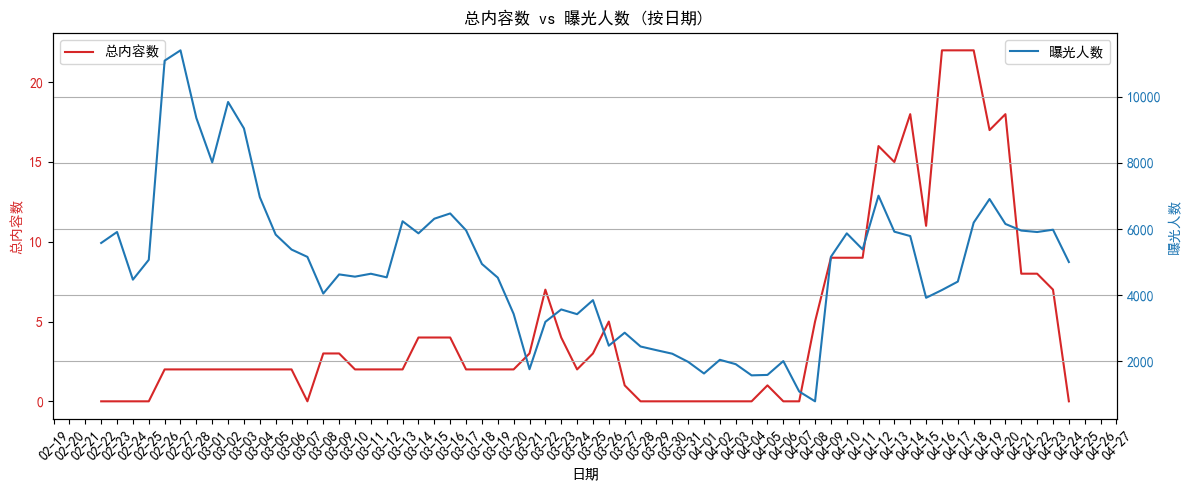

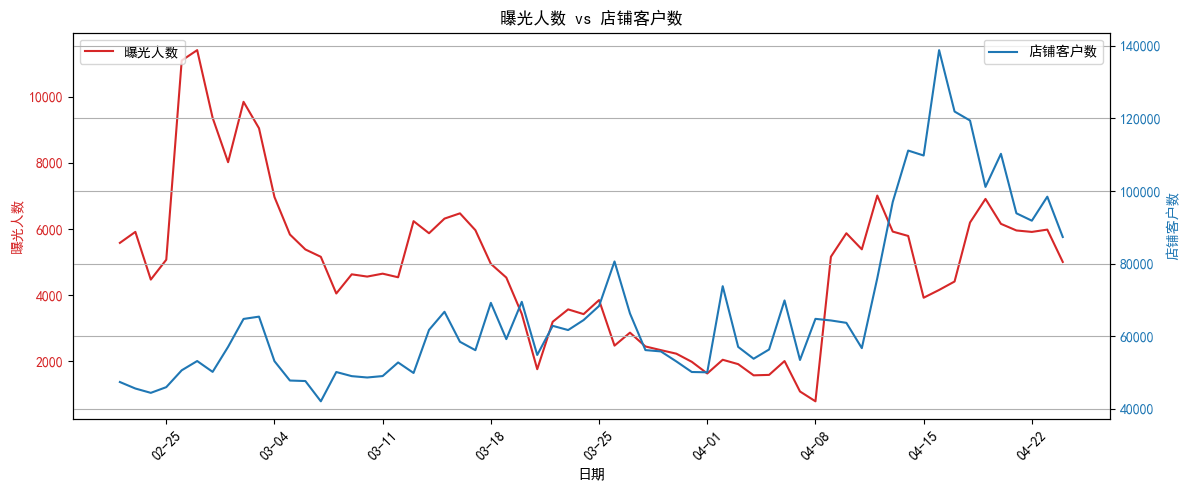

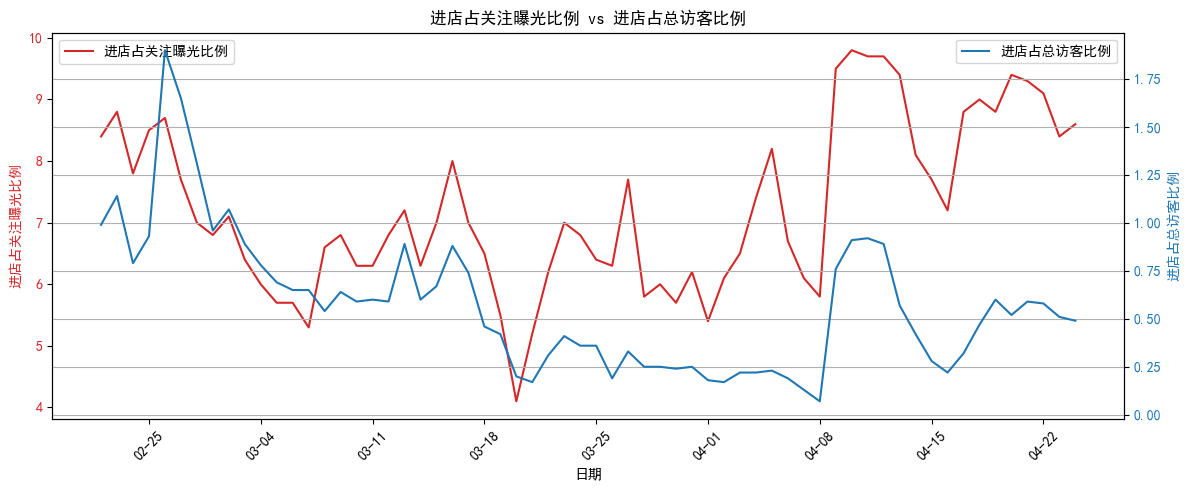

In [70]:
import io
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df_analysis2.head(62).copy()



def plot_two_columns(df, col1, col2, title=None, date_interval=1):
    """
    绘制 DataFrame 中两列数据的双坐标折线图。

    Args:
        df (pd.DataFrame): 包含数据的 DataFrame，需要包含日期列 '日期'。
        col1 (str): 第一个要绘制的列名。
        col2 (str): 第二个要绘制的列名。
        title (str, optional): 图表的标题。默认为 None。
        date_interval (int, optional): x 轴日期标签的显示间隔（天）。默认为 1。
    """
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # 绘制第一个列
    color1 = 'tab:red'
    ax1.set_xlabel('日期')
    ax1.set_ylabel(col1, color=color1)
    ax1.plot(df['日期'], df[col1], color=color1, label=col1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=date_interval))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')

    # 绘制第二个列
    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    ax2.set_ylabel(col2, color=color2)
    ax2.plot(df['日期'], df[col2], color=color2, label=col2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.legend(loc='upper right')

    if title:
        plt.title(title)
    else:
        plt.title(f'{col1} vs {col2} (按日期)')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 假设你的 DataFrame 叫做 df_analysis2
# df = df_analysis2.copy()

# 确保 '日期' 列是 datetime 类型
df['日期'] = pd.to_datetime(df['日期'])
print(df.columns)

# 使用新的方法绘制 '总内容数' 和 '曝光人数'
plot_two_columns(df, '总内容数', '曝光人数')


plot_two_columns(df, '曝光人数', '店铺客户数', title='曝光人数 vs 店铺客户数', date_interval=7)

plot_two_columns(df, '进店占关注曝光比例', '进店占总访客比例', title='进店占关注曝光比例 vs 进店占总访客比例', date_interval=7)